In [1]:
import pandas as pd
import swifter

/Users/iamvinitk/miniconda3/envs/NER-CMPE-257/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
read_me = pd.read_parquet('../dataset/Read Me.parquet')

In [3]:
read_me.head()

,O*NET 27.2 Database
0,February 2023 Release
1,---------------------
2,For information on current and future releases...
3,please visit:
4,https://www.onetcenter.org/database.html


In [4]:
job_description = pd.read_parquet('../dataset/cleaned_jobs_desc.parquet')

In [5]:
job_description.head(10)

,job_title,company_name,job_description,clean_text
0,HyresadministratÃ¶r till uppdrag i GÃ¶teborg!,TNG Group AB,Ã„r du extra serviceorienterad och samtidigt Ã...,r du extra serviceorienterad och samtidigt lsk...
1,Registered Nurse - RGN / RMN,Maria Mallaband Care Group,Registered Nurse - RGN / RMN CAPTION: Job de...,registered nurse - rgn / rmn caption : job det...
2,Specialist Nurse,Bromley Healthcare Diabetes Services,Diabetes Specialist Nurse - Band 7 Band 7 ...,diabetes specialist nurse - band 7 band 7 main...
3,Care Worker - Wells & Shepton Mallet,Networx,"At Somerset Care, our values and culture is wh...","somerset care , values culture makes us differ..."
4,"Kundansvarig redovisningskonsult, Karlskrona",Aspia,Ã„r du en driven och engagerad redovisningskon...,r du en driven och engagerad redovisningskonsu...
5,Admiral Nurse - Band 6,Gloucestershire Hospitals Nhs Foundation Trust...,"Admiral Nurse job vacancies Admiral Nurse, B...","admiral nurse job vacancies admiral nurse , ba..."
6,Consultant in Stroke Medicine,Blackpool Teaching Hospitals NHS Foundation Trust,Blackpool Teaching Hospitals NHS Foundation Tr...,blackpool teaching hospitals nhs foundation tr...
7,Apprentice Trainee Assistant Practitioner Surg...,North Cumbria Integrated Care NHS Foundation T...,Cumbria Partnership NHS Foundation Trust (CPFT...,cumbria partnership nhs foundation trust ( cpf...
8,Highly Specialised Clinical Trials Pharmacist,Portsmouth Hospitals NHS Trust,Portsmouth Hospitals NHS Trust is one of the l...,portsmouth hospitals nhs trust one largest acu...
9,Specialist Dietitian â€“ Diabetes,University Hospitals Birmingham NHS Foundation...,UHB is one of the largest teaching hospital tr...,uhb one largest teaching hospital trusts engla...


In [6]:
job_description.shape

(159589, 4)

In [7]:
job_description.reset_index(inplace=True, drop=True)

In [8]:
# filter out the jobs that contains job_title or clean_text not in english using langdetect
from langdetect import detect

In [9]:
def detect_lang(text):
    try:
        return detect(text)
    except:
        return 'unknown'

In [10]:
job_description['lang'] = job_description['clean_text'].swifter.apply(detect_lang)

Pandas Apply: 100%|██████████| 159589/159589 [12:25<00:00, 214.19it/s]


In [11]:
# plot the distribution of the language
import seaborn as sns

<Axes: xlabel='lang', ylabel='count'>

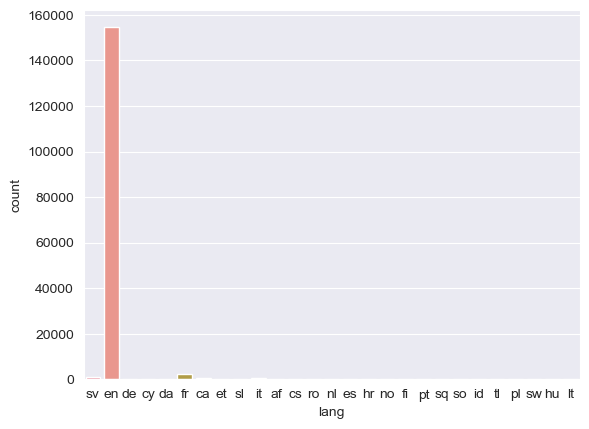

In [12]:
sns.countplot(x='lang', data=job_description)

In [14]:
# filter out the jobs that contains job_title or clean_text not in english
job_description = job_description[(job_description['lang'] == 'en')]

In [15]:
job_description.shape

(154526, 5)

In [16]:
skills = pd.read_parquet('../dataset/Skills.parquet')

In [17]:
skills.head()

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,2.A.1.a,Reading Comprehension,IM,4.12,8.0,0.13,3.88,4.37,N,None,07/2014,Analyst
1,11-1011.00,2.A.1.a,Reading Comprehension,LV,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst
2,11-1011.00,2.A.1.b,Active Listening,IM,4.12,8.0,0.13,3.88,4.37,N,None,07/2014,Analyst
3,11-1011.00,2.A.1.b,Active Listening,LV,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst
4,11-1011.00,2.A.1.c,Writing,IM,4.00,8.0,0.00,4.00,4.00,N,None,07/2014,Analyst


In [18]:
skills.shape

(61110, 13)

In [19]:
# unique Element Name in skills
skills['Element Name'].unique()

array(['Reading Comprehension', 'Active Listening', 'Writing', 'Speaking',
       'Mathematics', 'Science', 'Critical Thinking', 'Active Learning',
       'Learning Strategies', 'Monitoring', 'Social Perceptiveness',
       'Coordination', 'Persuasion', 'Negotiation', 'Instructing',
       'Service Orientation', 'Complex Problem Solving',
       'Operations Analysis', 'Technology Design', 'Equipment Selection',
       'Installation', 'Programming', 'Operations Monitoring',
       'Operation and Control', 'Equipment Maintenance',
       'Troubleshooting', 'Repairing', 'Quality Control Analysis',
       'Judgment and Decision Making', 'Systems Analysis',
       'Systems Evaluation', 'Time Management',
       'Management of Financial Resources',
       'Management of Material Resources',
       'Management of Personnel Resources'], dtype=object)